# Text Classification ULMFiT.

## Setting Up Necessary Things

In [1]:
# Jupyter Notebook Magic Command - Auto Reloading
%reload_ext autoreload
%autoreload 2

# Jupyter Notebook Magic Command - Inline Plotting
%matplotlib inline

In [2]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# NVIDIA Status
! nvidia-smi

Wed Aug 16 20:11:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/TC.Video.Game

/content/drive/MyDrive/Colab Notebooks/TC.Video.Game


## Necessary Imports

In [6]:
! pip install -Uqq fastai nbdev fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
from fastai.text.all import *

## Data Cleaning

In [8]:
# Load Data Into DataFrame
df = pd.read_csv("data/raw_data/game_details.csv")
df.head()

,Name,Summary,Genres
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","['Action Adventure', 'Fantasy']"
1,Tony Hawk's Pro Skater 2,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.","['Sports', 'Alternative', 'Skateboarding']"
2,Grand Theft Auto IV,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nigh...","['Action Adventure', 'Modern', 'Modern', 'Open-World']"
3,SoulCalibur,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!","['Action', 'Fighting', '3D']"
4,Grand Theft Auto IV,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living...","['Action Adventure', 'Modern', 'Modern', 'Open-World']"


In [9]:
# Shape of the DataFrame
df.shape

(20406, 3)

### Total Number of Genres

In [10]:
genres_list = df["Genres"].to_list()    # list of all the genres
genres_count = {}                       # count of all the genres

for genres in genres_list:
    genre_list = eval(genres)

    for genre in genre_list:
        if genre in genres_count.keys():
            genres_count[genre] += 1
        else:
            genres_count[genre] = 1

In [11]:
print("Total Number of Genres: ", len(genres_count))

sorted_genres_count = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))
print("Individual Genres Count: \n", sorted_genres_count)

Total Number of Genres:  178
Individual Genres Count: 
 {'Action': 7097, 'General': 7035, 'Shooter': 3549, 'Action Adventure': 3424, 'Platformer': 2371, 'Arcade': 2355, 'Role-Playing': 2341, '3D': 2127, 'Adventure': 1995, '2D': 1979, 'Miscellaneous': 1927, 'Strategy': 1905, 'First-Person': 1875, 'Sci-Fi': 1779, 'Fantasy': 1729, 'Sports': 1727, 'Modern': 1569, 'Puzzle': 1376, 'Action RPG': 1300, 'Racing': 1239, 'Sim': 1162, 'Simulation': 1160, 'Third-Person': 1040, 'Traditional': 1015, 'Driving': 971, 'Historic': 915, 'Fighting': 838, 'Automobile': 782, 'Real-Time': 772, 'Turn-Based': 740, 'Open-World': 736, "Beat-'Em-Up": 713, 'Team': 619, 'Compilation': 546, 'Survival': 544, 'Individual': 450, "Shoot-'Em-Up": 433, 'Point-and-Click': 430, 'Horror': 419, 'Japanese-Style': 415, 'Music': 411, 'Tactical': 405, 'Tactics': 392, 'Combat': 382, 'Linear': 353, 'Console-style RPG': 346, 'Rhythm': 340, 'Management': 334, 'GT / Street': 283, 'Western-Style': 279, 'Soccer': 276, 'Scrolling': 264, '

### Using Only 1st Category of the Genres: Single-Label Classification

In [12]:
primary_genre_list = []    # only first genre
indices_to_drop = []       # empty genre indices drop

for idx, genres in enumerate(df["Genres"].to_list()):
    genres_list = eval(genres)

    if len(genres_list) != 0:
        primary_genre_list.append(genres_list[0])
    else:
        indices_to_drop.append(idx)

In [13]:
# Total Primary Genres
print("Total Primary Genres: ", len(primary_genre_list))
print(primary_genre_list)

# Total Indices to Drop
print("Total Indices to Drop: ", len(indices_to_drop))

Total Primary Genres:  19894
['Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action Adventure', 'Sports', 'Action Adventure', 'Action', 'Action Adventure', 'Action', 'Action', 'Action Adventure', 'Action Adventure', 'Modern', 'Role-Playing', 'Modern', 'Sports', 'Action Adventure', 'Role-Playing', 'Sports', 'Action', 'Action Adventure', 'Action Adventure', 'Action', 'Action Adventure', 'Action', 'Action', 'Sports', 'Action', 'Modern', 'Fantasy', 'Action', 'Action', 'Action Adventure', 'Action Adventure', 'Action', 'Action', 'Action Adventure', 'Action', 'Role-Playing', 'Role-Playing', 'Adventure', 'Action Adventure', 'Role-Playing', 'Action', 'Role-Playing', 'Action Adventure', 'Action Adventure', 'Driving', 'Action Adventure', 'Action', 'Action Adventure', 'Miscellaneous', 'Miscellaneous', 'Role

In [14]:
# Drop Empty Genre Data
df = df.drop(indices_to_drop).reset_index(drop=True)

In [15]:
# Create a Column Named Primary Genre
df["Primary Genre"] = primary_genre_list

In [16]:
# Individual Primary Genre Values Count
print("Primary Genre Value Count: ")
df["Primary Genre"].value_counts()

Primary Genre Value Count: 


Action                6436
Action Adventure      2579
Role-Playing          2081
Sports                1620
Strategy              1608
                      ... 
Party / Minigame         1
Survival                 1
Street                   1
Dancing                  1
Online Multiplayer       1
Name: Primary Genre, Length: 70, dtype: int64

In [17]:
# After Inserting Primary Genre
df.head()

,Name,Summary,Genres,Primary Genre
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.","['Action Adventure', 'Fantasy']",Action Adventure
1,Tony Hawk's Pro Skater 2,"As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.","['Sports', 'Alternative', 'Skateboarding']",Sports
2,Grand Theft Auto IV,"[Metacritic's 2008 PS3 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nigh...","['Action Adventure', 'Modern', 'Modern', 'Open-World']",Action Adventure
3,SoulCalibur,"This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!","['Action', 'Fighting', '3D']",Action
4,Grand Theft Auto IV,"[Metacritic's 2008 Xbox 360 Game of the Year; Also known as ""GTA IV""] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living...","['Action Adventure', 'Modern', 'Modern', 'Open-World']",Action Adventure


### Removing Rare Genres

In [18]:
genre_count = df["Primary Genre"].value_counts()
threshold = int(len(df) * 0.004)

rare_genres = [item for item, count in genre_count.items() if count < threshold]

print("Total Rare Genres: ", len(rare_genres))

Total Rare Genres:  58


In [19]:
# Rare indices to drop
rare_indices_to_drop = [index for index, row in df.iterrows() if row["Primary Genre"] in rare_genres]

print("Total Rare Indices to Drop: ", len(rare_indices_to_drop))

Total Rare Indices to Drop:  493


In [20]:
# Drop Rare Genres
df = df.drop(rare_indices_to_drop).reset_index(drop=True)

In [21]:
# Shape After Dropping Rare Genres
df.shape

(19401, 4)

In [22]:
# Show Remaining Primary Genres
print("Total Remaining Genres Count: ", len(df["Primary Genre"].value_counts()))

print("Individual Genres Count: ")
df["Primary Genre"].value_counts()

Total Remaining Genres Count:  12
Individual Genres Count: 


Action              6436
Action Adventure    2579
Role-Playing        2081
Sports              1620
Strategy            1608
Miscellaneous       1366
Adventure           1346
Driving              921
Simulation           640
Racing               355
General              249
Puzzle               200
Name: Primary Genre, dtype: int64

In [23]:
# Drop Genres Column
df.drop(["Genres"], axis = 1, inplace = True)

In [24]:
# Drop Duplicate Summary from the DataFrame
df = df.drop_duplicates(subset = "Summary", keep='first')

In [25]:
# Description of The DataFrame
df.describe(include="object")

,Name,Summary,Primary Genre
count,15038,15037,15038
unique,12412,15037,12
top,MX vs. ATV Untamed,"As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.",Action
freq,6,1,4916


## Data-Loaders

In [26]:
doc(RandomSplitter)

In [27]:
dls = TextDataLoaders.from_df(
    df,
    text_col="Summary",
    label_col="Primary Genre",
    bs=16,
    seq_len=512,
    splitter=RandomSplitter(valid_pct=0.1, seed=42)
)

*We have 2 vocabulary. One for "Summary" text and another for "Primary Genre" label.*

In [28]:
# Summary Vocabulary
dls.vocab[0][:15]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 'the',
 ',',
 '.',
 'and',
 'of',
 'to']

In [29]:
# Primary Genre Vocabulary
dls.vocab[1][:15]

(#12) ['Action','Action Adventure','Adventure','Driving','General','Miscellaneous','Puzzle','Racing','Role-Playing','Simulation'...]

In [30]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj in xxmaj the xxmaj eternal xxmaj cylinder , players control a herd of adorable creatures called xxmaj trebhums and must explore a strange alien world filled with exotic lifeforms , surreal environments , and the constant threat of the xxmaj cylinder , a gargantuan rolling structure of ancient origin which crushes everything in its path . xxmaj this unique ecosystem is a massive , procedurally generated land with unique animal xxup ai , real - time world destruction , and organic exploration and puzzle design to create emergent gameplay that ensures no two playthroughs are ever the same . xxmaj your xxmaj trebhums begin at the bottom of the natural food chain but can mutate and evolve with new physical attributes and abilities by eating a variety of flora and fauna . xxmaj discover and adapt dozens of mutations , including new traversal skills like flying and swimming",Action Adventure
1,"xxbos xxmaj strikers 1945 a revolution broke out in shooting games in 1995 . xxmaj the xxmaj japanese brand "" psikyo "" introduced a new enemy 's attack , "" spread bullets "" not seen before then , and the history of a new shooting game began . xxmaj strikers 1945 xxup ii xxmaj if you went to a video arcade , you might know a certain name . xxmaj the name is "" psikyo . "" xxmaj the xxmaj psikyo made an awful disaster that called "" psikyo xxmaj bullets . "" xxmaj many players felt xxunk about speedy bullets from enemies and they xxunk at the end . xxmaj however , they were attracted to the magical power of "" psikyo xxmaj bullets "" before they know . xxmaj psikyo 's games were named "" psikyo xxmaj shooting "" by big fans and xxmaj psikyo xxmaj shooting is",Action
2,"xxbos xxmaj enter the xxmaj chaos - infested xxmaj caligari xxmaj sector and purge the unclean with the most powerful agents of the xxmaj imperium of xxmaj man . xxmaj warhammer 40 , xxrep 3 0 : xxmaj inquisitor xxmaj martyr is a grim action - rpg featuring multiple classes of the xxmaj inquisition who will carry out the will of the xxmaj emperor even in the darkest reaches of the xxmaj imperium . xxup the xxup next xxup milestone xxup in xxup the xxup evolution xxup of xxup xxunk . xxmaj the first action - rpg set in the grim future of the 41st xxmaj millennium takes the genre to its next level : an open - world sandbox game with a persistent universe with a huge variety of missions , tactical , brutal combat encounters in destructible environments and a storyline influenced by the community of players .",Adventure


In [31]:
torch.save(dls, "dataloaders/dls_text_class.pkl")

In [32]:
# dls = torch.load("dataloaders/dls_text_class.pkl")

## Modeling

In [33]:
doc(text_classifier_learner)

In [34]:
learner = text_classifier_learner(
    dls,
    AWD_LSTM,
    drop_mult=0.5,
    metrics=accuracy
).to_fp16()

In [35]:
learner.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(19496, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(19496, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0-2): 3 x RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)
      )
      (1): LinBnDrop(
        (0): B

In [36]:
# Replace Random Values With The Previous Encoder
learner = learner.load_encoder("lm-encoder-finetuned")

### Stage: 0

In [37]:
learner.freeze()

SuggestedLRs(slide=0.013182567432522774, valley=0.004365158267319202)

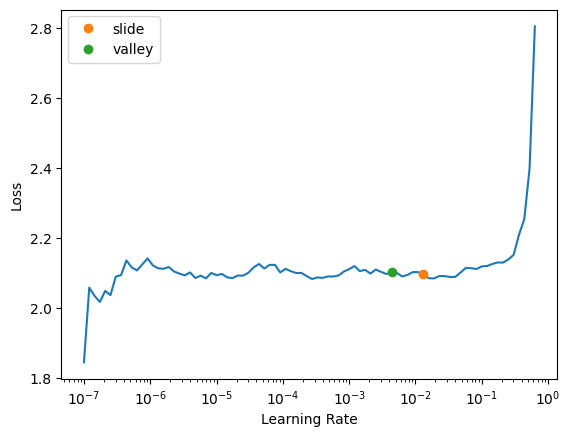

In [40]:
learner.lr_find(suggest_funcs=(slide, valley))

In [41]:
learner.fit_one_cycle(1, 8.25e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.087002,2.081400,0.338876,00:40


In [42]:
learner.save("game-classifier-stage-0")

Path('models/game-classifier-stage-0.pth')

### Stage: 1

In [43]:
learner.freeze_to(-2)

SuggestedLRs(slide=0.010964781977236271, valley=0.00363078061491251)

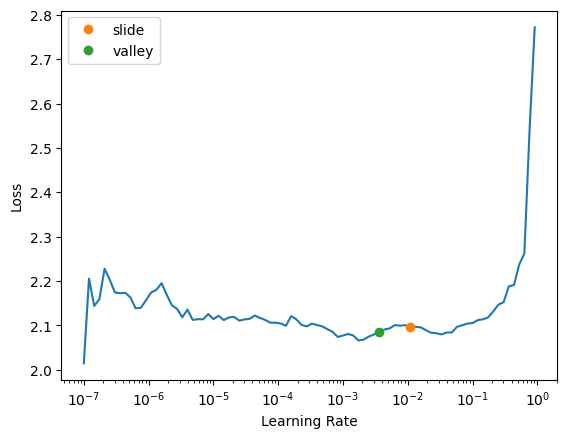

In [44]:
learner.lr_find(suggest_funcs=(slide, valley))

In [46]:
learner.fit_one_cycle(1, 6.5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.108429,2.076594,0.338876,00:49


In [47]:
learner.save("game-classifier-stage-1")

Path('models/game-classifier-stage-1.pth')

### Stage: 2

In [48]:
learner.freeze_to(-3)

SuggestedLRs(slide=0.013182567432522774, valley=0.00013182566908653826)

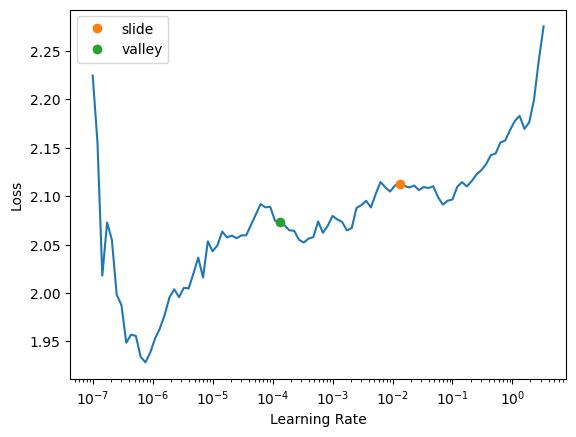

In [51]:
learner.lr_find(suggest_funcs=(slide, valley))

In [52]:
learner.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.105287,22.962898,0.212837,00:59


In [53]:
learner.save("game-classifier-stage-2")

Path('models/game-classifier-stage-2.pth')

### Stage: 3

In [63]:
learner.unfreeze()

SuggestedLRs(slide=0.10000000149011612, valley=0.0010000000474974513)

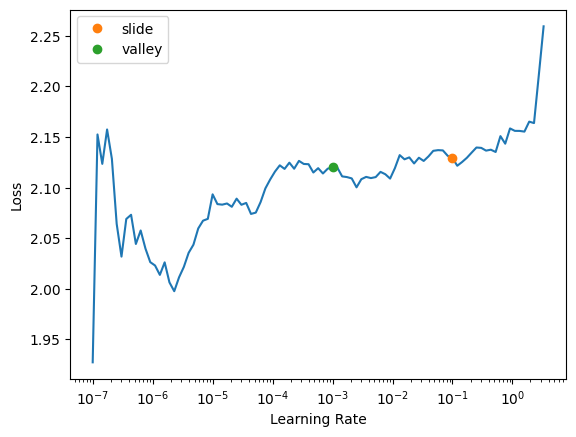

In [64]:
learner.lr_find(suggest_funcs=(slide, valley))

In [66]:
learner.fit_one_cycle(5, slice(9.25e-2, 2.25e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.132541,313.277069,0.087130,01:12
1,2.128007,466.147461,0.114732,01:13
2,2.090318,8.072891,0.297306,01:14
3,2.113420,6.446841,0.336548,01:11
4,2.124532,33.619987,0.336548,01:13


In [57]:
learner.save("game-classifier-stage-3")

Path('models/game-classifier-stage-3.pth')

*4 stage finetuning is the approach taken by ULMFit Paper*

## Predict Model

In [60]:
game_dummy_summary = "As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages."

learner.predict(game_dummy_summary)

('Action',
 tensor(0),
 tensor([0.3386, 0.1311, 0.0662, 0.0464, 0.0124, 0.0700, 0.0102, 0.0171, 0.1045,
         0.0326, 0.0870, 0.0839]))